In [1]:
import re
from typing import Optional, Callable
from pathlib import Path
from urllib.request import urlopen
from fiona.io import ZipMemoryFile
import numpy as np
import pandas as pd
import geopandas as gpd
import geoviews as gv
from thefuzz import fuzz
import hvplot
import hvplot.pandas
import holoviews as hv
from holoviews import streams
import colorcet as cc
import panel as pn
import panel.widgets as pnw
import seaborn as sns
from wordcloud import WordCloud
from PIL import ImageDraw, Image

from translate_app import translate_list_to_dict

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
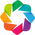

In [2]:
# suppress warnings
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 50
gv.extension("bokeh")
hv.extension("bokeh")
hvplot.extension("bokeh")
pn.extension()

pn.config.throttled = True

In [3]:
def convert_to_snake_case(item):
    # Add _ before uppercase in camelCase
    s1 = re.sub(r"(.)([A-Z][a-z]+)", r"\1_\2", item)
    # Add _ before uppercase following lowercase or digit
    s2 = re.sub(r"([a-z0-9])([A-Z])", r"\1_\2", s1)
    # Add _ between letter and digit
    s3 = re.sub(r"([a-zA-Z])([0-9])", r"\1_\2", s2)
    s4 = re.sub(r"[-\s]", "_", s3).lower()  # Replace hyphen or space with _
    return s4


def sanitize_df_column_names(df):
    """Function to danitize column names by translating and conveting to snake case"""
    column_list = df.columns.tolist()
    # translate the column names
    translated_dict = translate_list_to_dict(column_list)
    # map the translated column names to the column names
    df.rename(columns=translated_dict, inplace=True)
    # convert the column names to snake case
    df.columns = [convert_to_snake_case(col) for col in df.columns]
    return df

In [4]:
def get_gdf_from_zip_url(zip_url: str) -> Optional[dict[str, gpd.GeoDataFrame]]:
    """Function to get the geojson data from the zip url.
    In the zip url, the geojson files are in the data folder."""
    gpd_dict = {}

    with urlopen(zip_url) as u:
        zip_data = u.read()
    with ZipMemoryFile(zip_data) as z:
        geofiles = z.listdir("data")
        for file in geofiles:
            with z.open("data/" + file) as g:
                gpd_dict[Path(file).stem] = gpd.GeoDataFrame.from_features(g, crs=g.crs)
    return gpd_dict if gpd_dict else None


def rename_keys(d, prefix="zurich_gdf_"):
    return {f"{prefix}{i}": v for i, (k, v) in enumerate(d.items())}

In [5]:
def find_breed_match(
    input_breed: str,
    breeds_df: pd.DataFrame,
    scoring_functions: list[Callable[[str, str], int]],
    scoring_threshold: int = 85,
) -> Optional[str]:
    """
    Find the match for the breed in the FCI breeds dataframe.
    breeds_df dataframe must have both a breed_en and alt_names column.
    """
    # Initialize the maximum score and best match
    max_score = scoring_threshold
    best_match = None

    # Iterate over each row in the breeds dataframe
    for index, breed_row in breeds_df.iterrows():
        # Get the alternative names for the current breed
        alternative_names = breed_row["alt_names"]

        # Calculate the score for the input breed and each alternative name
        # using each scoring function, and take the maximum of these scores
        current_score = max(
            max(
                scoring_function(input_breed, alt_name)
                for scoring_function in scoring_functions
            )
            for alt_name in alternative_names
        )
        # If the current score is greater than the maximum score, update the
        # maximum score and best match
        if current_score > max_score:
            max_score = current_score
            best_match = breed_row["breed_en"]

        # If the maximum score is 100, we have a perfect match and can break
        # out of the loop early
        if max_score == 100:
            break

    # Return the best match
    return best_match


def apply_fuzzy_matching_to_breed_column(
    dataframe: pd.DataFrame,
    breed_column: str,
    fci_df: pd.DataFrame,
    scoring_functions: list[Callable[[str, str], int]],
    scoring_threshold: int = 85,
) -> pd.Series:
    """Apply fuzzy matching to the breed column in the dataframe."""

    return dataframe[breed_column].apply(
        lambda breed: find_breed_match(
            breed, fci_df, scoring_functions, scoring_threshold=scoring_threshold
        )
    )

#### Zurich Dogs Dataset
In this dataset you will find information on dogs and their owners from the owners of the municipal dog register since 2015. In the case of dog owners, information on the age group, gender and statistical neighbourhood of the place of residence is provided. For each dog, the breed, the breed type, the sex, the year of birth, the age and the color is recorded. The dog register is maintained by the Dog Control Department of the Zurich City Police.

According to the law on the keeping of dogs, the city police are obliged to keep a register of dogs kept in the city of Zurich. Every dog over the age of three months must be registered at the dog control by the owner in person or by means of the registration form.

In [6]:
zurich_dog_data_link = "https://data.stadt-zuerich.ch/dataset/sid_stapo_hundebestand_od1001/download/KUL100OD1001.csv"
zurich_dog_data = pd.read_csv(zurich_dog_data_link)
zurich_dog_data = sanitize_df_column_names(zurich_dog_data)
zurich_dog_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70967 entries, 0 to 70966
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   deadline_date_year       70967 non-null  int64 
 1   data_status_cd           70967 non-null  object
 2   holder_id                70967 non-null  int64 
 3   age_v_10_cd              70967 non-null  int64 
 4   age_v_10_long            70967 non-null  object
 5   age_v_10_sort            70967 non-null  int64 
 6   sex_cd                   70967 non-null  int64 
 7   sex_long                 70967 non-null  object
 8   sex_sort                 70967 non-null  int64 
 9   circle_cd                70967 non-null  int64 
 10  circle_lang              70967 non-null  object
 11  circle_sort              70967 non-null  int64 
 12  quar_cd                  70967 non-null  int64 
 13  quar_lang                70967 non-null  object
 14  quar_sort                70967 non-nul

In [7]:
zurich_dog_data["breed_mixed__breed_sort"].value_counts()
breed_cat_list_de = zurich_dog_data["breed_mongrel_long"].unique().tolist()
breed_cat_dict = translate_list_to_dict(breed_cat_list_de)

zurich_dog_data["mixed_type"] = zurich_dog_data["breed_mongrel_long"].map(
    breed_cat_dict
)
zurich_dog_data["owner_id"] = zurich_dog_data["holder_id"].astype(str).str.zfill(6)
zurich_dog_data

,deadline_date_year,data_status_cd,holder_id,age_v_10_cd,age_v_10_long,age_v_10_sort,sex_cd,sex_long,sex_sort,circle_cd,circle_lang,circle_sort,quar_cd,quar_lang,quar_sort,race_1_text,race_2_text,breed_mixed__breed_cd,breed_mongrel_long,breed_mixed__breed_sort,breed_type_cd,breed_type_long,breed__type_sort,birth_dog_year,age_v_dog_cd,age_v_dog_long,age_v_dog_sort,sex_dog_cd,sex_dog_long,sex_dog_sort,dog_color_text,number_of_dogs,mixed_type,owner_id
0,2015,D,126,60,60- bis 69-Jährige,7,1,männlich,1,9,Kreis 9,9,92,Altstetten,92,Welsh Terrier,Keine,1,Rassehund,1,K,Kleinwüchsig,1,2011,3,3-Jährige,3,2,weiblich,2,schwarz/braun,1,Pedigree dog,000126
1,2015,D,574,60,60- bis 69-Jährige,7,2,weiblich,2,2,Kreis 2,2,23,Leimbach,23,Cairn Terrier,Keine,1,Rassehund,1,K,Kleinwüchsig,1,2002,12,12-Jährige,12,2,weiblich,2,brindle,1,Pedigree dog,000574
2,2015,D,695,40,40- bis 49-Jährige,5,1,männlich,1,6,Kreis 6,6,63,Oberstrass,63,Labrador Retriever,Keine,1,Rassehund,1,I,Rassentypenliste I,2,2012,2,2-Jährige,2,2,weiblich,2,braun,1,Pedigree dog,000695
3,2015,D,893,60,60- bis 69-Jährige,7,2,weiblich,2,7,Kreis 7,7,71,Fluntern,71,Mittelschnauzer,Keine,1,Rassehund,1,I,Rassentypenliste I,2,2010,4,4-Jährige,4,2,weiblich,2,schwarz,1,Pedigree dog,000893
4,2015,D,1177,50,50- bis 59-Jährige,6,1,männlich,1,10,Kreis 10,10,102,Wipkingen,102,Shih Tzu,Keine,1,Rassehund,1,K,Kleinwüchsig,1,2011,3,3-Jährige,3,1,männlich,1,schwarz/weiss,1,Pedigree dog,001177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70962,2023,P,163270,30,30- bis 39-Jährige,4,2,weiblich,2,9,Kreis 9,9,91,Albisrieden,91,Holländischer Schäfer,Keine,1,Rassehund,1,I,Rassentypenliste I,2,2019,3,3-Jährige,3,1,männlich,1,gestromt,1,Pedigree dog,163270
70963,2023,P,163274,50,50- bis 59-Jährige,6,2,weiblich,2,10,Kreis 10,10,102,Wipkingen,102,Pudel,Labrador Retriever,2,"Mischling, beide Rassen bekannt",2,I,Rassentypenliste I,2,2023,0,0-Jährige,0,2,weiblich,2,schwarz/weiss,1,"Mixed breed, both breeds known",163274
70964,2023,P,163275,50,50- bis 59-Jährige,6,2,weiblich,2,4,Kreis 4,4,42,Langstrasse,42,Bichon à poil frisé,Keine,1,Rassehund,1,K,Kleinwüchsig,1,2021,1,1-Jährige,1,1,männlich,1,weiss,1,Pedigree dog,163275
70965,2023,P,163276,20,20- bis 29-Jährige,3,2,weiblich,2,3,Kreis 3,3,33,Friesenberg,33,Malteser,Keine,1,Rassehund,1,K,Kleinwüchsig,1,2022,0,0-Jährige,0,2,weiblich,2,beige,1,Pedigree dog,163276


In [10]:
zurich_dog_data["breed_mongrel_long"].value_counts()

Rassehund                               50711
Mischling, beide Rassen unbekannt        9095
Mischling, beide Rassen bekannt          5584
Mischling, sekundäre Rasse unbekannt     5577
Name: breed_mongrel_long, dtype: int64

In [9]:
zurich_dog_data["is_male_owner"] = zurich_dog_data["sex_cd"] == 1
zurich_dog_data["is_male_dog"] = zurich_dog_data["sex_dog_cd"] == 1
zurich_dog_data["age_group_10"] = zurich_dog_data["age_v_10_cd"].copy()
zurich_dog_data["age_group_10s"] = zurich_dog_data["age_group_10"].astype(str) + "s"
zurich_dog_data["dog_age"] = (
    zurich_dog_data["deadline_date_year"] - zurich_dog_data["birth_dog_year"] + 1
)
zurich_dog_data["district"] = zurich_dog_data["circle_cd"].copy()
zurich_dog_data["sub_district"] = (
    zurich_dog_data["quar_cd"].copy().astype(str).str.zfill(3)
)
zurich_dog_data["breed_type"] = zurich_dog_data["breed_type_cd"].copy()
zurich_dog_data["roster"] = zurich_dog_data["deadline_date_year"].copy()
zurich_dog_data["dog_count"] = zurich_dog_data["number_of_dogs"].copy()
zurich_dog_data["is_pure_breed"] = (
    zurich_dog_data["breed_mixed__breed_sort"].copy() == 1
)
zurich_dog_data["breed_1"] = zurich_dog_data["race_1_text"].copy()
zurich_dog_data["breed_2"] = zurich_dog_data["race_2_text"].copy()
zurich_dog_data["neighborhood"] = zurich_dog_data["quar_lang"].copy()
zurich_dog_data["dog_color"] = zurich_dog_data["dog_color_text"].copy()

columns_of_interest = [
    "owner_id",
    "is_male_owner",
    "is_male_dog",
    "age_group_10s",
    "dog_age",
    "district",
    "sub_district",
    "breed_type",
    "roster",
    "dog_count",
    "is_pure_breed",
    "breed_1",
    "breed_2",
    "neighborhood",
    "dog_color",
]
dog_data = zurich_dog_data[columns_of_interest].copy()

In [9]:
dog_data.query('breed_1.str.contains(r".*doodle", regex=True, na=False, case=False)')


doodle_mask = dog_data["breed_1"].str.contains(
    r".*doodle", regex=True, na=False, case=False
)

In [10]:
dog_data.loc[doodle_mask, "is_pure_breed"] = False
dog_data.loc[doodle_mask, "breed_2"] = "Pudel"
dog_data.loc[doodle_mask, "breed_1"] = "Labrador Retreiver"
dog_data

,owner_id,is_male_owner,is_male_dog,age_group_10,dog_age,district,sub_district,breed_type,roster,dog_count,is_pure_breed,breed_1,breed_2,neighborhood,dog_color
0,000126,True,False,60,5,9,092,K,2015,1,True,Welsh Terrier,Keine,Altstetten,schwarz/braun
1,000574,False,False,60,14,2,023,K,2015,1,True,Cairn Terrier,Keine,Leimbach,brindle
2,000695,True,False,40,4,6,063,I,2015,1,True,Labrador Retriever,Keine,Oberstrass,braun
3,000893,False,False,60,6,7,071,I,2015,1,True,Mittelschnauzer,Keine,Fluntern,schwarz
4,001177,True,True,50,5,10,102,K,2015,1,True,Shih Tzu,Keine,Wipkingen,schwarz/weiss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70962,163270,False,True,30,5,9,091,I,2023,1,True,Holländischer Schäfer,Keine,Albisrieden,gestromt
70963,163274,False,False,50,1,10,102,I,2023,1,False,Pudel,Labrador Retriever,Wipkingen,schwarz/weiss
70964,163275,False,True,50,3,4,042,K,2023,1,True,Bichon à poil frisé,Keine,Langstrasse,weiss
70965,163276,False,False,20,2,3,033,K,2023,1,True,Malteser,Keine,Friesenberg,beige


In [11]:
dog_data.groupby(["roster"]).size()

dog_data.loc[dog_data["roster"] == 2023]["breed_2"].value_counts().head(50)

Keine                          6721
Unbekannt                      1830
Pudel                           131
Zwergpudel                       56
Labrador Retriever               48
Pomeranian                       39
Chihuahua                        36
Golden Retriever                 35
Malteser                         35
Border Collie                    33
Jack Russel Terrier              31
Grosspudel                       20
Appenzeller Sennenhund           18
Yorkshire Terrier                17
American Cocker Spaniel          17
Shih Tzu                         16
Dachshund                        16
Australian Shepherd              14
Mops                             14
Berner Sennenhund                13
Zwergpinscher                    13
Deutscher Schäferhund            12
Zwergspitz                       11
Mittelpudel                      11
Kleinpudel                       10
Labrador                          9
Bichon Havanais                   8
English Cocker Spaniel      

#### Zurich Population Dataset
Number of economic resident population by statistical urban district, origin, sex, age year, 5-year age groups and year, since 1993.



In [12]:
zurich_pop_link = "https://data.stadt-zuerich.ch/dataset/bev_bestand_jahr_quartier_alter_herkunft_geschlecht_od3903/download/BEV390OD3903.csv"
zurich_pop_data = pd.read_csv(zurich_pop_link)
zurich_pop_data = sanitize_df_column_names(zurich_pop_data)
zurich_pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370658 entries, 0 to 370657
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   deadline_date_year  370658 non-null  int64 
 1   age_v_sort          370658 non-null  int64 
 2   age_v_cd            370658 non-null  int64 
 3   age_v_short         370658 non-null  int64 
 4   age_v_05_sort       370658 non-null  int64 
 5   age_v_05_cd         370658 non-null  int64 
 6   age_v_05_short      370658 non-null  object
 7   age_v_10_cd         370658 non-null  int64 
 8   age_v_10_short      370658 non-null  object
 9   age_v_20_cd         370658 non-null  int64 
 10  age_v_20_short      370658 non-null  object
 11  sex_cd              370658 non-null  int64 
 12  sex_long            370658 non-null  object
 13  sex_short           370658 non-null  object
 14  circle_cd           370658 non-null  int64 
 15  circle_lang         370658 non-null  object
 16  qu

In [13]:
zurich_pop_data.sample(10)

,deadline_date_year,age_v_sort,age_v_cd,age_v_short,age_v_05_sort,age_v_05_cd,age_v_05_short,age_v_10_cd,age_v_10_short,age_v_20_cd,age_v_20_short,sex_cd,sex_long,sex_short,circle_cd,circle_lang,quar_sort,quar_cd,quar_lang,place_of_origin,origin_cd,origin_lang,number_we
41174,1996,35,35,35,8,35,35-39,30,30-39,20,20-39,2,weiblich,W,8,Kreis 8,82,82,Mühlebach,2,2,Ausländer*in,11
119912,2002,78,78,78,16,75,75-79,70,70-79,60,60-79,1,männlich,M,5,Kreis 5,52,52,Escher Wyss,1,1,Schweizer*in,3
226810,2011,50,50,50,11,50,50-54,50,50-59,40,40-59,1,männlich,M,1,Kreis 1,13,13,Lindenhof,1,1,Schweizer*in,6
280773,2015,82,82,82,17,80,80-84,80,80-89,80,80-99,1,männlich,M,1,Kreis 1,14,14,City,1,1,Schweizer*in,0
166297,2006,58,58,58,12,55,55-59,50,50-59,40,40-59,1,männlich,M,6,Kreis 6,61,61,Unterstrass,1,1,Schweizer*in,63
43759,1996,55,55,55,12,55,55-59,50,50-59,40,40-59,1,männlich,M,10,Kreis 10,102,102,Wipkingen,1,1,Schweizer*in,37
345975,2021,4,4,4,1,0,0-4,0,0-9,0,0-19,2,weiblich,W,3,Kreis 3,34,34,Sihlfeld,2,2,Ausländer*in,14
278079,2015,61,61,61,13,60,60-64,60,60-69,60,60-79,2,weiblich,W,11,Kreis 11,115,115,Oerlikon,2,2,Ausländer*in,15
245449,2013,3,3,3,1,0,0-4,0,0-9,0,0-19,2,weiblich,W,4,Kreis 4,41,41,Werd,2,2,Ausländer*in,5
366271,2022,61,61,61,13,60,60-64,60,60-69,60,60-79,2,weiblich,W,7,Kreis 7,71,71,Fluntern,2,2,Ausländer*in,11


In [14]:
zurich_pop_data["is_swiss"] = zurich_pop_data["origin_lang"].str.contains(
    "Schweizer", regex=False, na=False, case=False
)
zurich_pop_data["neighborhood"] = zurich_pop_data["quar_lang"].copy()
zurich_pop_data["district"] = zurich_pop_data["circle_cd"].copy()
zurich_pop_data["sub_district"] = (
    zurich_pop_data["quar_cd"].copy().astype(str).str.zfill(3)
)
zurich_pop_data["roster"] = zurich_pop_data["deadline_date_year"].copy()
zurich_pop_data["age_group_10"] = zurich_pop_data["age_v_10_cd"].copy()
zurich_pop_data["age"] = zurich_pop_data["age_v_cd"].copy()
zurich_pop_data["is_male"] = zurich_pop_data["sex_cd"] == 1
zurich_pop_data["pop_count"] = zurich_pop_data["number_we"].copy()

columns_of_interest = [
    "is_swiss",
    "neighborhood",
    "district",
    "sub_district",
    "roster",
    "age_group_10",
    "age",
    "is_male",
    "pop_count",
]

pop_data = zurich_pop_data[columns_of_interest].copy()
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370658 entries, 0 to 370657
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   is_swiss      370658 non-null  bool  
 1   neighborhood  370658 non-null  object
 2   district      370658 non-null  int64 
 3   sub_district  370658 non-null  object
 4   roster        370658 non-null  int64 
 5   age_group_10  370658 non-null  int64 
 6   age           370658 non-null  int64 
 7   is_male       370658 non-null  bool  
 8   pop_count     370658 non-null  int64 
dtypes: bool(2), int64(5), object(2)
memory usage: 20.5+ MB


In [15]:
pop_data.loc[pop_data["roster"] == 2022]["pop_count"].sum()

443037

#### Zurich Income Dataset
These data contain quantile values of the taxable income of natural persons who are primarily taxable in the city of Zurich

In [16]:
zurich_income_link = "https://data.stadt-zuerich.ch/dataset/fd_median_einkommen_quartier_od1003/download/WIR100OD1003.csv"
zurich_income_data = pd.read_csv(zurich_income_link)
zurich_income_data = sanitize_df_column_names(zurich_income_data)
zurich_income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   deadline_date_year  2244 non-null   int64  
 1   quar_sort           2244 non-null   int64  
 2   quar_cd             2244 non-null   int64  
 3   quar_lang           2244 non-null   object 
 4   tax_tariff_sort     2244 non-null   int64  
 5   tax_tariff_cd       2244 non-null   int64  
 6   tax_tariff_long     2244 non-null   object 
 7   tax_income_p_50     2181 non-null   float64
 8   tax_income_p_25     2181 non-null   float64
 9   tax_income_p_75     2181 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 175.4+ KB


In [17]:
zurich_income_data

,deadline_date_year,quar_sort,quar_cd,quar_lang,tax_tariff_sort,tax_tariff_cd,tax_tariff_long,tax_income_p_50,tax_income_p_25,tax_income_p_75
0,1999,11,11,Rathaus,0,0,Grundtarif,39.90,18.7,65.20
1,1999,11,11,Rathaus,1,1,Verheiratetentarif,80.40,48.1,128.00
2,1999,11,11,Rathaus,2,2,Einelternfamilientarif,44.60,25.0,87.50
3,1999,12,12,Hochschulen,0,0,Grundtarif,31.05,12.4,55.20
4,1999,12,12,Hochschulen,1,1,Verheiratetentarif,89.20,52.0,178.70
...,...,...,...,...,...,...,...,...,...,...
2239,2020,122,122,Schwamendingen-Mitte,1,1,Verheiratetentarif,62.85,39.7,89.15
2240,2020,122,122,Schwamendingen-Mitte,2,2,Einelternfamilientarif,30.90,14.6,52.30
2241,2020,123,123,Hirzenbach,0,0,Grundtarif,33.50,13.5,52.30
2242,2020,123,123,Hirzenbach,1,1,Verheiratetentarif,64.45,40.6,88.00


In [18]:
tax_tariff_long_de = zurich_income_data.tax_tariff_long.unique().tolist()
tax_tariff_long_translated = translate_list_to_dict(tax_tariff_long_de)
display(tax_tariff_long_translated)
zurich_income_data["tax_status"] = zurich_income_data.tax_tariff_long.map(
    tax_tariff_long_translated
)
# Create the neighborhood, roster, district, sub_district columns
zurich_income_data["neighborhood"] = zurich_income_data["quar_lang"].copy()
zurich_income_data["roster"] = zurich_income_data["deadline_date_year"].copy()
zurich_income_data["sub_district"] = (
    zurich_income_data["quar_cd"].copy().astype(str).str.zfill(3)
)
zurich_income_data["district"] = zurich_income_data["sub_district"].str[:2].astype(
    int).copy()
zurich_income_data["median_income"] = zurich_income_data["tax_income_p_50"].copy()
zurich_income_data["lower_q_income"] = zurich_income_data["tax_income_p_25"].copy()
zurich_income_data["upper_q_income"] = zurich_income_data["tax_income_p_75"].copy()

columns_of_interest = [
    "neighborhood",
    "roster",
    "district",
    "sub_district",
    "tax_status",
    "median_income",
    "lower_q_income",
    "upper_q_income",
]
# create a dataframe with only the columns of interest
income_data = zurich_income_data[columns_of_interest].copy()
income_data.info()

{'Grundtarif': 'Basic tariff',
 'Verheiratetentarif': 'Married rate',
 'Einelternfamilientarif': 'Single-parent family tariff'}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   neighborhood    2244 non-null   object 
 1   roster          2244 non-null   int64  
 2   district        2244 non-null   int32  
 3   sub_district    2244 non-null   object 
 4   tax_status      2244 non-null   object 
 5   median_income   2181 non-null   float64
 6   lower_q_income  2181 non-null   float64
 7   upper_q_income  2181 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 131.6+ KB


In [19]:
income_data.loc[income_data["median_income"].isna()]

,neighborhood,roster,district,sub_district,tax_status,median_income,lower_q_income,upper_q_income
5,Hochschulen,1999,1,012,Single-parent family tariff,NaN,NaN,NaN
8,Lindenhof,1999,1,013,Single-parent family tariff,NaN,NaN,NaN
11,City,1999,1,014,Single-parent family tariff,NaN,NaN,NaN
107,Hochschulen,2000,1,012,Single-parent family tariff,NaN,NaN,NaN
110,Lindenhof,2000,1,013,Single-parent family tariff,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2048,Lindenhof,2019,1,013,Single-parent family tariff,NaN,NaN,NaN
2051,City,2019,1,014,Single-parent family tariff,NaN,NaN,NaN
2147,Hochschulen,2020,1,012,Single-parent family tariff,NaN,NaN,NaN
2150,Lindenhof,2020,1,013,Single-parent family tariff,NaN,NaN,NaN


#### Zurich Household Dataset
Number of private households as well as the economic population of the city of Zurich in private households by household size, urban district, statistical urban district and year, since 2013.

A household includes all persons who live together in the same apartment. For this purpose, the term "economic residence" is used for persons. Collective households (homes, hospitals, penal institutions, communal accommodation for asylum seekers, etc.) are not taken into account.

In [20]:
zurich_household_data_link = "https://data.stadt-zuerich.ch/dataset/bev_hh_haushaltsgroesse_quartier_seit2013_od3806/download/BEV380OD3806.csv"
zurich_household_data = pd.read_csv(zurich_household_data_link)
zurich_household_data = sanitize_df_column_names(zurich_household_data)
zurich_household_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   key_day_dat_year  2040 non-null   int64 
 1   quar_sort         2040 non-null   int64 
 2   quar_lang         2040 non-null   object
 3   circle_sort       2040 non-null   int64 
 4   circle_lang       2040 non-null   object
 5   hh_size_sort      2040 non-null   int64 
 6   hh_size_lang      2040 non-null   object
 7   number_hh         2040 non-null   int64 
 8   number_we         2040 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 143.6+ KB


In [21]:
zurich_household_data

,key_day_dat_year,quar_sort,quar_lang,circle_sort,circle_lang,hh_size_sort,hh_size_lang,number_hh,number_we
0,2013,11,Rathaus,1,Kreis 1,1,1 Person,1146,1146
1,2013,11,Rathaus,1,Kreis 1,2,2 Personen,472,944
2,2013,11,Rathaus,1,Kreis 1,3,3 Personen,138,414
3,2013,11,Rathaus,1,Kreis 1,4,4 Personen,67,268
4,2013,11,Rathaus,1,Kreis 1,5,5 Personen,27,135
...,...,...,...,...,...,...,...,...,...
2035,2022,123,Hirzenbach,12,Kreis 12,2,2 Personen,1625,3250
2036,2022,123,Hirzenbach,12,Kreis 12,3,3 Personen,824,2472
2037,2022,123,Hirzenbach,12,Kreis 12,4,4 Personen,711,2844
2038,2022,123,Hirzenbach,12,Kreis 12,5,5 Personen,212,1060


In [22]:
zurich_household_data["neighborhood"] = zurich_household_data["quar_lang"].copy()
zurich_household_data["roster"] = zurich_household_data["key_day_dat_year"].copy()
zurich_household_data["sub_district"] = (
    zurich_household_data["quar_sort"].copy().astype(str).str.zfill(3)
)
zurich_household_data["district"] = zurich_household_data["sub_district"].str[:2].astype(
    int).copy()
zurich_household_data["household_size"] = (
    zurich_household_data["hh_size_sort"].copy().astype(str).str.zfill(2)
)
zurich_household_data["household_count"] = zurich_household_data["number_hh"].copy()
zurich_household_data["resident_count"] = zurich_household_data["number_we"].copy()

# create a dataframe with only the columns of interest
columns_of_interest = [
    "neighborhood",
    "roster",
    "district",
    "sub_district",
    "household_size",
    "household_count",
    "resident_count",
]
household_data = zurich_household_data[columns_of_interest].copy()

In [23]:
household_data.loc[
    (household_data["sub_district"] == "013") & (
        household_data["roster"] == 2022)
]["resident_count"].sum()

1015

In [24]:
pop_data.loc[(pop_data["sub_district"] == "013") & (pop_data["roster"] == 2022)][
    "pop_count"
].sum()

1034

#### Zurich Districts and Quarters
Statistical districts are an administrative division of the city of Zurich. For statistical purposes, the city of Zurich is divided into 34 statistical districts, based on the 12 districts or 22 urban districts. These, in turn, consist of 216 statistical zones.

Purpose: Statistical data of the City of Zurich are often divided into statistical districts, urban districts or statistical zones for spatial differentiation. In general, administrative divisions serve as the basis for internal administrative tasks for the departments of the City of Zurich.

In [25]:
zip_gdf_url = "https://storage.googleapis.com/mrprime_dataset/zurich/zurich_statistical_quarters.zip"
zurich_gdfs = get_gdf_from_zip_url(zip_gdf_url)

In [26]:
z_gdf = rename_keys(zurich_gdfs, prefix="z_gdf_")

In [27]:
zurich_map_gdf = z_gdf["z_gdf_2"]

zurich_map_gdf.rename(
    columns={"qname": "neighborhood",
             "qnr": "sub_district", "knr": "district"},
    inplace=True,
)
zurich_map_gdf["sub_district"] = zurich_map_gdf["sub_district"].astype(
    str).str.zfill(3)
# zurich_map_gdf["district"] = zurich_map_gdf["district"].astype(
#     str).str.zfill(2)
map_gdf = zurich_map_gdf[
    ["neighborhood", "sub_district", "district", "geometry"]
].copy()

In [28]:
poly_opts = dict(
    width=800,
    height=800,
    line_width=2,
    color_index=None,
    xaxis=None,
    yaxis=None,
)

neighborhood_poly = gv.Polygons(map_gdf).opts(
    tools=["hover", "tap"],
    **poly_opts,
    line_color="crimson",
    fill_color="lightgray",
    alpha=0.2,
)

In [29]:
districts_gdf = (
    map_gdf.dissolve(by="district")
    .drop(columns=["neighborhood", "sub_district"])
    .reset_index()
)

district_poly = gv.Polygons(districts_gdf).opts(**poly_opts)

(district_poly * neighborhood_poly).opts(title="Zurich Districts and Neighborhoods")

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (district)
   .Polygons.II :Polygons   [Longitude,Latitude]   (neighborhood,sub_district,district)

Dog Breeds Standardization

In [30]:
dog_data["breed_1"] = dog_data["breed_1"].str.lower()
dog_data["breed_2"] = dog_data["breed_2"].str.lower()

dog_breeds = (
    dog_data["breed_1"].unique().tolist() +
    dog_data["breed_2"].unique().tolist()
)
dog_breeds = set(dog_breeds)
display(len(dog_breeds))
dog_breeds_df = (
    pd.DataFrame(dog_breeds, columns=["breed"])
    .sort_values(by="breed")
    .reset_index(drop=True)
)
dog_breeds_df["standard"] = None
# dog_breeds_df

399

In [31]:
fci_akc_breeds = pd.read_json("../data/fci_akc_breeds.json")
fci_akc_breeds

,breed_en,alt_names,was_merged
0,affenpinscher,[affenpinscher],True
1,afghan hound,"[levrier afghan, lebrel afgano, afghanischer w...",True
2,airedale terrier,[airedale terrier],True
3,akita,"[akita, japanese akitainu, akita inu, american...",True
4,alaskan malamute,"[malamute de l'alaska, malamute, malamute de a...",True
...,...,...,...
387,working kelpie,[working kelpie],False
388,xoloitzcuintle,"[xoloitzcuintle, xoloitzcuintli, mexikanischer...",True
389,yakutian laika,"[laïka de iakoutie, laika de iakoutie, yakutia...",False
390,yorkshire terrier,"[terrier du yorkshire, yorkshire terrier]",True


In [32]:


nan_mask = dog_breeds_df["standard"].isna()
dog_breeds_df.loc[nan_mask, "standard"] = apply_fuzzy_matching_to_breed_column(
    dog_breeds_df[nan_mask], "breed", fci_akc_breeds, [fuzz.WRatio]
)
nan_mask = dog_breeds_df["standard"].isna()
dog_breeds_df.loc[nan_mask, "standard"] = apply_fuzzy_matching_to_breed_column(
    dog_breeds_df[nan_mask], "breed", fci_akc_breeds, [fuzz.partial_ratio]
)
display(dog_breeds_df.isna().sum())

# update the nan_mask
nan_mask = dog_breeds_df["standard"].isna()

breed        0
standard    10
dtype: int64

In [33]:
# dog_breeds_df.query('breed.str.contains(r"bulldog")')
dog_breeds_df.loc[nan_mask]

,breed,standard
6,alaskan husky,None
28,bardino,None
208,keine,None
251,mischling,None
305,ratenero bodeguero,None
306,ratero,None
354,tamaskan,None
362,toller,None
370,unbekannt,None
389,wäller,None


In [34]:
mixed_breed_mask = dog_breeds_df["breed"].str.contains(r"unbekannt|mischling")
dog_breeds_df.loc[mixed_breed_mask, "standard"] = "mixed"
keine_mask = dog_breeds_df["breed"].str.contains(r"keine")
dog_breeds_df.loc[keine_mask, "standard"] = "none"

In [35]:
toller_mask = dog_breeds_df["breed"].str.contains(r"toll")
dog_breeds_df.loc[toller_mask, "standard"] = fci_akc_breeds.loc[
    fci_akc_breeds["breed_en"].str.contains(r"toll")
]["breed_en"].values[0]

dog_breeds_df["standard"].fillna("unrecognized", inplace=True)

In [36]:
dog_breeds_df.loc[
    dog_breeds_df["standard"].str.contains(r"swiss hound"), "standard"
] = "swiss hound"

dog_breeds_df.loc[
    dog_breeds_df["standard"].str.contains(r"russian toy"), "standard"
] = "russian tsvetnaya bolonka"

In [37]:
dog_breeds_dict = dog_breeds_df.set_index("breed")["standard"].to_dict()

dog_data["breed_1_standard"] = dog_data["breed_1"].map(dog_breeds_dict)
dog_data["breed_2_standard"] = dog_data["breed_2"].map(dog_breeds_dict)
dog_data.info()

dog_data.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70967 entries, 0 to 70966
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   owner_id          70967 non-null  object
 1   is_male_owner     70967 non-null  bool  
 2   is_male_dog       70967 non-null  bool  
 3   age_group_10      70967 non-null  int64 
 4   dog_age           70967 non-null  int64 
 5   district          70967 non-null  int64 
 6   sub_district      70967 non-null  object
 7   breed_type        70967 non-null  object
 8   roster            70967 non-null  int64 
 9   dog_count         70967 non-null  int64 
 10  is_pure_breed     70967 non-null  bool  
 11  breed_1           70967 non-null  object
 12  breed_2           70967 non-null  object
 13  neighborhood      70967 non-null  object
 14  dog_color         70967 non-null  object
 15  breed_1_standard  70967 non-null  object
 16  breed_2_standard  70967 non-null  object
dtypes: bool(3), 

,owner_id,is_male_owner,is_male_dog,age_group_10,dog_age,district,sub_district,breed_type,roster,dog_count,is_pure_breed,breed_1,breed_2,neighborhood,dog_color,breed_1_standard,breed_2_standard
32911,125472,False,True,50,8,11,119,K,2019,1,False,unbekannt,unbekannt,Seebach,hellbraun,mixed,mixed
60218,157577,True,True,30,10,9,091,I,2022,1,True,deutscher boxer,keine,Albisrieden,hellbraun,boxer,none
3274,099137,False,True,60,7,11,119,K,2015,1,False,unbekannt,unbekannt,Seebach,schwarz/braun,mixed,mixed


In [38]:
dog_data["age_group_10"] = pd.Categorical(dog_data["age_group_10"], ordered=True)
dog_data["age_group_10"].cat.categories
dog_data["roster"] = dog_data["roster"].astype(str)
dog_data["roster"] = pd.Categorical(dog_data["roster"], ordered=True)
dog_data["roster"].cat.categories

Index(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], dtype='object')

In [39]:
ktopn = (
    dog_data.loc[dog_data["breed_type"] == "K"]["breed_1_standard"]
    .value_counts()
    .head(15)
    .index.tolist()
)

ktopn_pure = (
    dog_data.loc[(dog_data["breed_type"] == "K") & (dog_data["is_pure_breed"])][
        "breed_1_standard"
    ]
    .value_counts()
    .head(15)
    .index.tolist()
)

itopn = (
    dog_data.loc[dog_data["breed_type"] == "I"]["breed_1_standard"]
    .value_counts()
    .head(15)
    .index.tolist()
)

itopn_pure = (
    dog_data.loc[(dog_data["breed_type"] == "I") & (dog_data["is_pure_breed"])][
        "breed_1_standard"
    ]
    .value_counts()
    .head(15)
    .index.tolist()
)
topn = ktopn + itopn
topn_pure = ktopn_pure + itopn_pure

In [40]:
dog_data.sample()

,owner_id,is_male_owner,is_male_dog,age_group_10,dog_age,district,sub_district,breed_type,roster,dog_count,is_pure_breed,breed_1,breed_2,neighborhood,dog_color,breed_1_standard,breed_2_standard
22712,089045,False,True,50,14,11,111,I,2018,1,True,deutscher schäfer,keine,Affoltern,schwarz/braun,german shepherd dog,none


In [41]:
# map the standard unique values to a cmap for consistency
cmap = cc.glasbey_dark
# explicit mapping for the color to use for each standard breed
explicit_mapping = {
    breed: cmap[i] for i, breed in enumerate(dog_data["breed_1_standard"].unique())
}
my_colors = hv.Cycle(list(explicit_mapping.values()))
# colormaps for the the gender
boy_cmap = list(sns.color_palette("light:#00008b", n_colors=6).as_hex())
girl_cmap = list(sns.color_palette("light:#8b008b", n_colors=6).as_hex())

In [42]:
hv.opts.defaults(
    hv.opts.HeatMap(
        tools=["hover", "tap", "box_select"],
        active_tools=["box_zoom"],
        width=800,
        height=500,
        ylabel="",
        line_color="white",
        line_width=2,
        toolbar="above",
        selection_line_color="red",
        nonselection_alpha=0.9,
        nonselection_line_color="white",
    )
)

poly_opts = dict(
    width=800,
    height=500,
    line_width=2,
    xaxis=None,
    yaxis=None,
    aspect="equal",
    # cmap=explicit_mapping,
    # projection=ccrs.GOOGLE_MERCATOR,
)
bar_opts = dict(
    invert_axes=True,
    width=800,
    height=500,
    tools=["hover", "tap", "box_select"],
    xaxis=None,
    ylabel="",
    xlabel="",
    cmap=explicit_mapping,
    show_legend=False,
    active_tools=["box_zoom"],
)

In [43]:
tools_opts = dict(active_tools=["box_zoom"], toolbar="above")
# bar plot of the owner age distribution
owner_age_groups_all = (
    dog_data.groupby(["age_group_10", "roster"])
    .size()
    .unstack()
    .rename(columns={0: "Count"})
    .hvplot.bar(
        xlabel="",
        rot=90,
        legend=True,
        tools=["hover", "box_select"],
        title="Owners Age distribution",
    )
    .opts(**tools_opts)
)
# kde plot of the dog age distribution
dog_age_all = dog_data.hvplot.kde(
    y="dog_age",
    by="roster",
    xlim=(0, 21),
    ylim=(0, 0.1),
    xlabel="",
    rot=90,
    legend=True,
    tools=["hover", "box_select"],
    title="Dog Age Density distribution",
    muted_alpha=0.01,
).opts(**tools_opts)
# step plot of the dog age distribution
dog_age_all_step = (
    dog_data.groupby(["dog_age", "roster"])
    .size()
    .hvplot.step(
        x="dog_age",
        by="roster",
        xlim=(0, 21),
        title="Dog Age distribution",
    )
    .opts(**tools_opts)
)
# panel card with the 3 plots
all_ages_card = pn.Card(
    # add spacer
    pn.Spacer(height=70),
    dog_age_all_step,
    dog_age_all,
    owner_age_groups_all,
    title="Age Distribution for ALL Dogs and Owners",
    styles={"background": "gainsboro"},
)

In [77]:
def plot_age_range_stats(df, breed, bw, is_pure_breed):
    """Function to plot the age_range stats for the breed owners and the dog age distribution"""
    if is_pure_breed:
        breed_df = df.query(
            f'breed_1_standard.str.contains("{breed}", case=False, regex=True, na=False) & is_pure_breed == True'
        )
    else:
        breed_df = df.query(
            f'breed_1_standard.str.contains("{breed}", case=False, regex=True, na=False)'
        )
    # plot a step plot of the dog_age
    step = (
        breed_df.groupby(["dog_age", "roster"])
        .size()
        .unstack()
        .hvplot.step(title=f"Dog Age distribution | {breed.title()}", shared_axes=False)
    )

    # plot age_range of breed_df kde plot
    kde = breed_df.hvplot.kde(
        y="dog_age",
        by="roster",
        bandwidth=bw,
        xlim=(0, 20),
        ylim=(0, None),
        xlabel="",
        muted_alpha=0.01,
        title=f"Dog Age density distribution | {breed.title()}",
    )
    # plot age_range of breed_df bar plot

    bar = (
        breed_df.groupby(["age_group_10", "roster"])
        .size()
        .unstack()
        .hvplot.bar(
            rot=90,
            legend=True,
            tools=["hover", "box_select"],
            title=f"Owner Age distribution | {breed.title()} ",
            shared_axes=False,
            xlabel="",
        )
        .opts(active_tools=["box_select"])
    )
    return (step + kde + bar).cols(1)


# create widgets for the breed, bandwidth
breed_selector = pnw.Select(name="Breed", options=topn, value="french bulldog")
top_n_slider = pnw.IntSlider(name="Top N", start=1, end=30, step=1, value=10, width=200)
bandwidth_slider = pnw.FloatSlider(
    name="Bandwidth", start=0.1, end=2, step=0.1, value=0.5, width=200
)
pure_breed_checkbox = pnw.Checkbox(name="Pure Breed", value=True, width=200)
is_male_owner_checkbox = pnw.Checkbox(name="Male Dog Owner", value=True, width=200)
roster_slider = pnw.DiscreteSlider(
    options=["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"],
    name="Roster",
    width=200,
)
show_labels_checkbox = pnw.Checkbox(name="Show Annotations", value=True, width=200)


# create a dynamic map

dynamic_age_plot = pn.bind(
    plot_age_range_stats,
    df=dog_data,
    breed=breed_selector,
    bw=bandwidth_slider,
    is_pure_breed=pure_breed_checkbox,
)
widget_controls = pn.Row(
    pure_breed_checkbox,
    breed_selector,
    bandwidth_slider,
    styles={"background": "mintcream"},
)
dynamic_age_card = pn.Card(
    widget_controls,
    dynamic_age_plot,
    title="Age Distribution of Dog and Owners by Breeds",
    styles={"background": "mintcream"},
)

In [78]:
# pn.Column(dynamic_age_card).show()
districts_gdf = districts_gdf.dissolve(by="district")
districts_gdf
# dog_data

,geometry,desc,district_name
district,,,
1,"POLYGON ((8.54195 47.37971, 8.54196 47.37972, ...",The most central district encompasses the hist...,"Old Town, City Center"
2,"POLYGON ((8.51982 47.32401, 8.51974 47.32401, ...",The architecturally attractive Enge Train Stat...,Left Shore of the Lake
3,"POLYGON ((8.51943 47.35125, 8.51889 47.35111, ...","Once mainly a working-class neighborhood, the ...",Creative Quarter of Wiedikon
4,"POLYGON ((8.53301 47.37394, 8.53299 47.37392, ...",The district around Langstrasse was long regar...,Creative Quarter of Langstrasse
5,"POLYGON ((8.53369 47.38593, 8.53620 47.38449, ...",In the quarter where huge machines once clatte...,Creative Quarter of Zürich-West
6,"POLYGON ((8.54797 47.39915, 8.54801 47.39918, ...","University buildings, Jugendstil villas, green...",University Quarter
7,"POLYGON ((8.60185 47.37186, 8.60188 47.37178, ...","The hillside location, little traffic, and fab...",On the Zürichberg
8,"POLYGON ((8.56493 47.34636, 8.56458 47.34619, ...",This district starts behind the Opera House an...,Right Shore of the Lake
9,"POLYGON ((8.50127 47.37961, 8.50121 47.37957, ...","For a long time, this district was solely know...",At the Foot of the Uetliberg


In [79]:
pn.state.kill_all_servers()


# get the count of the french bulldog in each district for each roster and plot it
# plot it on a dynamic map with a slider for the roster
def get_breed_count(breed, roster):
    df = dog_data[
        (dog_data["breed_1_standard"] == breed)
        & (dog_data["roster"].str.contains(roster))
    ][["district", "breed_1_standard", "roster"]]
    df = df.groupby("district").size().reset_index(name="count")
    df = df.set_index("district")

    breed_gdf = districts_gdf.merge(df, left_index=True, right_index=True, how="left")
    # breed_gdf = breed_gdf.drop(columns=["desc", "km2"])
    breed_color = explicit_mapping[breed]
    # Start from white and go to the breed color
    breed_cmap = list(sns.color_palette("light:" + breed_color, n_colors=6).as_hex())
    return gv.Polygons(breed_gdf).opts(
        **poly_opts,
        color="count",
        # fill_alpha=0,
        cmap=breed_cmap,
        clim=(0, 50),
        colorbar=True,
        tools=["hover", "tap", "box_select"],
        title=f"{breed.title()} | {roster}",
    )


standard_selecter = pnw.Select(name="Breed", options=topn, value="french bulldog")
# create the dynamic map
breed_chloro = gv.DynamicMap(
    pn.bind(get_breed_count, breed=breed_selector, roster=roster_slider)
)

In [80]:
basemap = gv.tile_sources.OSM().opts(alpha=0.5, bgcolor="black")
# pn.Column(standard_selecter, pn.Row(roster_slider, basemap * breed_chloro))
# breed_chloro

In [81]:
# poly_opts = dict(
#     width=800,
#     height=800,
#     line_width=2,
#     color_index=None,
#     xaxis=None,
#     yaxis=None,
# )

neighborhood_poly = gv.Polygons(map_gdf).opts(
    tools=["hover", "tap"],
    **poly_opts,
    line_color="crimson",
    # fill_color="lightgray",
    # fill_alpha=0,
    alpha=0.2,
)

In [82]:
districts_gdf = (
    map_gdf.dissolve(by="district")
    .drop(columns=["neighborhood", "sub_district"])
    .reset_index()
)

district_poly = gv.Polygons(districts_gdf).opts(
    **poly_opts,
    color_index=None,
)

# (district_poly * neighborhood_poly).opts(title="Zurich Districts and Neighborhoods")

In [83]:
zurich_desc_path = "../data/zurich_districts.csv"
zurich_desc = pd.read_csv(zurich_desc_path)
# zurich_desc["district"] = zurich_desc["district"].astype(str).str.zfill(2)
districts_gdf["district"] = districts_gdf["district"].astype(int)

districts_gdf = districts_gdf.merge(
    zurich_desc[["district", "desc", "district_name"]], on="district", how="left"
)
# districts_gdf.set_index("district", inplace=True)
district_poly = gv.Polygons(districts_gdf)

In [84]:
districts_gdf = districts_gdf.dissolve(by="district")
district_poly = gv.Polygons(districts_gdf)

# districts_gdf
district_poly.data

,geometry,desc,district_name
district,,,
1,"POLYGON ((8.54195 47.37971, 8.54196 47.37972, ...",The most central district encompasses the hist...,"Old Town, City Center"
2,"POLYGON ((8.51982 47.32401, 8.51974 47.32401, ...",The architecturally attractive Enge Train Stat...,Left Shore of the Lake
3,"POLYGON ((8.51943 47.35125, 8.51889 47.35111, ...","Once mainly a working-class neighborhood, the ...",Creative Quarter of Wiedikon
4,"POLYGON ((8.53301 47.37394, 8.53299 47.37392, ...",The district around Langstrasse was long regar...,Creative Quarter of Langstrasse
5,"POLYGON ((8.53369 47.38593, 8.53620 47.38449, ...",In the quarter where huge machines once clatte...,Creative Quarter of Zürich-West
6,"POLYGON ((8.54797 47.39915, 8.54801 47.39918, ...","University buildings, Jugendstil villas, green...",University Quarter
7,"POLYGON ((8.60185 47.37186, 8.60188 47.37178, ...","The hillside location, little traffic, and fab...",On the Zürichberg
8,"POLYGON ((8.56493 47.34636, 8.56458 47.34619, ...",This district starts behind the Opera House an...,Right Shore of the Lake
9,"POLYGON ((8.50127 47.37961, 8.50121 47.37957, ...","For a long time, this district was solely know...",At the Foot of the Uetliberg


In [85]:
# create a stream which selects a district from the map
select_district = streams.Selection1D(source=district_poly)


def display_info(index):
    if not index:
        return pn.pane.Markdown("No district selected")
    else:
        selected_district = (
            district_poly.iloc[index[0]]
            .data[["district", "district_name", "desc"]]
            .drop_duplicates()
        )
        dname = selected_district["district_name"].values[0]
        dnum = selected_district["district"].values[0]
        ddesc = selected_district["desc"].values[0]
        return pn.pane.Markdown(
            f"#### {dnum}\n ### {dname}\n {ddesc}",
        )


def display_wordcloud(index, breed):
    breed_color = explicit_mapping[breed]
    if len(index) == 0:
        text = "district select on map"
        wordcloud = WordCloud(width=800, height=500, background_color="white").generate(
            text
        )
        return hv.RGB(np.array(wordcloud))
    else:
        selected_district = (
            district_poly.iloc[index[0]]
            .data[["district", "district_name", "desc"]]
            .drop_duplicates()
        )
        dname = selected_district["district_name"].values[0]
        dnum = selected_district["district"].values[0]
        ddesc = selected_district["desc"].values[0]
        text = f"{dnum} {dname} {ddesc}"

        polygon = district_poly.iloc[index[0]].data["geometry"].iloc[0]

        # Get the bounding box of the polygon
        minx, miny, maxx, maxy = polygon.bounds

        # Calculate the width and height of the bounding box
        width = maxx - minx
        height = maxy - miny

        # Create a new image with the same aspect ratio as the bounding box
        image_width = 800
        image_height = int(image_width * height / width)
        test = Image.new("1", (image_width, image_height), 0)

        # Convert the coordinates to a numpy array
        coords = np.array(list(polygon.exterior.coords))
        coords -= [minx, miny]
        coords *= [image_width / width, image_height / height]
        coords[:, 1] = image_height - coords[:, 1]
        # Convert the coordinates back to a list of tuples
        scaled_coords = list(map(tuple, coords))

        # Draw the scaled polygon onto the image
        ImageDraw.Draw(test).polygon(scaled_coords, outline=1, fill=1)

        wordcloud = WordCloud(
            mask=~np.array(test) * 255,
            color_func=lambda *args, **kwargs: breed_color,
            include_numbers=True,
            margin=20,
            contour_color=breed_color,
            contour_width=5,
            width=800,
            height=500,
            background_color="white",
        ).generate(text)
        return hv.RGB(np.array(wordcloud)).opts(
            width=800,
            height=500,
            tools=["box_zoom"],
            active_tools=["box_zoom"],
            xaxis=None,
            yaxis=None,
            # toolbar=None,
        )


layout = pn.Column(
    pn.bind(display_wordcloud, select_district.param.index, breed=breed_selector),
    district_poly * breed_chloro,
    pn.bind(display_info, select_district.param.index),
    width=800,
)

breed_chloro_card = pn.Card(
    roster_slider, layout, title="Chloropleth of Selected Breed"
)
# breed_chloro_card

In [86]:
# pn.Row(
#     dynamic_age_card,
#     breed_chloro_card,
#     all_ages_card,
#     sizing_mode="stretch_width",
# ).show()

Gender Heatmap


In [87]:
# Create a Tap stream linked to the HeatMap
breed_tap = streams.Tap(source=None)


@pn.depends(roster_slider.param.value, is_male_owner_checkbox.param.value)
def get_gender_roster_df(roster, gender):
    return dog_data.loc[
        (dog_data["is_male_owner"] == gender) & (dog_data["roster"] == roster)
    ]


@pn.depends(
    roster_slider.param.value,
    is_male_owner_checkbox.param.value,
    top_n_slider.param.value,
)
def get_top_n_gender_breeds(roster, gender, top_n):
    gender_roster_df = get_gender_roster_df(roster=roster, gender=gender)
    return (
        gender_roster_df["breed_1_standard"].value_counts().head(
            top_n).index.tolist()
    )


@pn.depends(
    roster_slider.param.value,
    is_male_owner_checkbox.param.value,
    top_n_slider.param.value,
)
def get_gender_heatmap(roster, gender, top_n):
    gender_roster_df = get_gender_roster_df(roster=roster, gender=gender)
    topn_gender_breeds = get_top_n_gender_breeds(
        roster=roster, gender=gender, top_n=top_n
    )

    top_gender_breeds_df = (
        gender_roster_df.loc[
            gender_roster_df["breed_1_standard"].isin(topn_gender_breeds)
        ]
        .groupby(["breed_1_standard", "district"])
        .size()
        .fillna(0)
        .reset_index(name="count")
    )
    sex = "Male" if gender else "Female"
    top_gender_breeds_heatmap = hv.HeatMap(
        top_gender_breeds_df, ["district", "breed_1_standard"], "count"
    ).redim(breed_1_standard="gender_standard")
    top_gender_breeds_heatmap.opts(
        height=(33 * top_n) + 50,
        cmap=boy_cmap if gender else girl_cmap,
        colorbar=True,
        active_tools=["box_zoom"],
        title=f"Top {top_n} breeds | {roster} | {sex} Owners",
        clim=(0, 50),
    )
    breed_tap.source = top_gender_breeds_heatmap

    return top_gender_breeds_heatmap


dynamic_gender_heatmap_panel = pn.pane.HoloViews(get_gender_heatmap)

# pn.Column(
#     roster_slider,
#     holder_gender_checkbox,
#     top_n_slider,
#     dynamic_gender_heatmap_panel,
# ).show()

In [89]:
@pn.depends(
    breed_tap.param.x,
    breed_tap.param.y,
    roster_slider.param.value,
    is_male_owner_checkbox.param.value,
)
def get_breed_chloropleth(x, y, roster, gender):
    if x is None or y is None:
        return gv.Polygons(districts_gdf).opts(**poly_opts, title="Select a cell")
    else:
        data = get_gender_roster_df(roster=roster, gender=gender)
        data = data.loc[data["breed_1_standard"] == y]
        data = data.groupby("district").size().reset_index(name="count")
        data = data.set_index("district")

        breed_gdf = districts_gdf.merge(
            data, left_index=True, right_index=True, how="left"
        )
        # breed_gdf = breed_gdf.drop(columns=["desc", "km2"])
        breed_gdf.fillna(0, inplace=True)
        breed_color = explicit_mapping[y]
        breed_cmap = list(
            sns.color_palette("light:" + breed_color, n_colors=6).as_hex()
        )
        sex = "Male" if gender else "Female"

        return gv.Polygons(breed_gdf).opts(
            **poly_opts,
            color="count",
            cmap=breed_cmap,
            clim=(0, 50),
            colorbar=True,
            line_color="darkgray",
            tools=["hover", "tap", "box_select"],
            title=f"{y.title()} | {roster} | {sex} Owners",
        )


breed_chloropleth = pn.pane.HoloViews(get_breed_chloropleth)


# Combine the heatmap and the text display into a layout
layout = pn.Column(
    roster_slider,
    is_male_owner_checkbox,
    top_n_slider,
    dynamic_gender_heatmap_panel,
    breed_chloropleth,
)

# layout.show()

In [93]:
# Define a Tap stream linked to the owner age group
owner_tap = streams.Tap(source=None, x=1, y=30)


@pn.depends(roster_slider.param.value, is_male_owner_checkbox.param.value)
def get_age_heatmap(roster, gender):
    data = get_gender_roster_df(roster=roster, gender=gender)
    data_grouped = (
        data.groupby(["district", "age_group_10"])["owner_id"]
        .nunique()
        .reset_index()
        .rename(columns={"owner_id": "count"})
    )
    sex = "Male" if gender else "Female"
    heatmap = hv.HeatMap(data_grouped, ["district", "age_group_10"], "count")

    heatmap.opts(
        # **heatmap_opts,
        cmap=boy_cmap if gender else girl_cmap,
        ylim=(0, 100),
        xlim=(0, 12),
        colorbar=True,
        active_tools=["box_zoom"],
        tools=["hover", "tap", "box_select"],
        title=f"{sex} Dog Owners | {roster} | by Age Group vs District",
    )
    owner_tap.source = heatmap
    return heatmap


age_group_panel = pn.pane.HoloViews(get_age_heatmap)

In [95]:
dog_data["age_group_10"].cat.categories

Int64Index([10, 20, 30, 40, 50, 60, 70, 80, 90, 999], dtype='int64')

In [94]:
import math

pn.state.kill_all_servers()
# Bar Plot which shows the top 10 breeds for each district and age group as it is selected in the heatmap

bar_plots_opts = dict(
    height=500,
    width=800,
    invert_axes=True,
    cmap=explicit_mapping,
    show_legend=False,
    xlabel="",
    fontscale=1.2,
)


@pn.depends(
    owner_tap.param.x,
    owner_tap.param.y,
    roster_slider.param.value,
    is_male_owner_checkbox.param.value,
)
def update_barplot(x, y, roster, gender):
    data = get_gender_roster_df(roster=roster, gender=gender)
    if x is None or y is None:
        bar_data = (
            data["breed_1_standard"]
            .value_counts()
            .head(10)
            .rename("count")
            .reset_index()
            .rename(columns={"index": "breed_1_standard"})
        )
        return hv.Bars(bar_data, kdims=["breed_1_standard"], vdims="count").opts(
            **bar_plots_opts,
            color="breed_1_standard",
            title=f"Top 10 Breeds",
            tools=["hover"],
            active_tools=["box_zoom"],
        )
    x = math.ceil(x - 0.5)
    y = math.ceil(y / 10) * 10
    bar_data = (
        data.loc[(data["district"] == x) & (data["age_group_10"] == y)][
            "breed_1_standard"
        ]
        .value_counts()
        .head(10)
        .reset_index()
    )
    bar_data.columns = ["breed_1_standard", "count"]
    if len(bar_data) == 0:
        return hv.Bars([], "breed_1_standard", "count").opts(
            **bar_plots_opts,
            title=f"No Breeds for Age-group:{y} | Districts:{x}",
            active_tools=["box_zoom"],
        )

    return hv.Bars(bar_data, "breed_1_standard", "count").opts(
        **bar_plots_opts,
        color="breed_1_standard",
        title=f"Top {min(10,len(bar_data))} Popular Breeds | Age-group:{y} | Districts:{x}",
    )


update_barplot_panel = pn.pane.HoloViews(update_barplot)
pn.Column(
    roster_slider,
    is_male_owner_checkbox,
    age_group_panel,
    update_barplot_panel,
).show()

Launching server at http://localhost:51031


In [76]:
dog_data

,owner_id,is_male_owner,is_male_dog,age_group_10,dog_age,district,sub_district,breed_type,roster,dog_count,is_pure_breed,breed_1,breed_2,neighborhood,dog_color,breed_1_standard,breed_2_standard
0,000126,True,False,60,5,9,092,K,2015,1,True,welsh terrier,keine,Altstetten,schwarz/braun,welsh terrier,none
1,000574,False,False,60,14,2,023,K,2015,1,True,cairn terrier,keine,Leimbach,brindle,cairn terrier,none
2,000695,True,False,40,4,6,063,I,2015,1,True,labrador retriever,keine,Oberstrass,braun,labrador retriever,none
3,000893,False,False,60,6,7,071,I,2015,1,True,mittelschnauzer,keine,Fluntern,schwarz,schnauzer,none
4,001177,True,True,50,5,10,102,K,2015,1,True,shih tzu,keine,Wipkingen,schwarz/weiss,shih tzu,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70962,163270,False,True,30,5,9,091,I,2023,1,True,holländischer schäfer,keine,Albisrieden,gestromt,dutch shepherd dog,none
70963,163274,False,False,50,1,10,102,I,2023,1,False,pudel,labrador retriever,Wipkingen,schwarz/weiss,poodle,labrador retriever
70964,163275,False,True,50,3,4,042,K,2023,1,True,bichon à poil frisé,keine,Langstrasse,weiss,bichon frise,none
70965,163276,False,False,20,2,3,033,K,2023,1,True,malteser,keine,Friesenberg,beige,maltese,none
